In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def research_vis_cat(df, df_features, palet):

    for feat in df_features:

        fig, ax = plt.subplots(1, 2, figsize=(15, 7))

        sns.countplot(df[feat], palette=palet, ax=ax[0])

        ax[0].set_xlabel(f'{df[feat].name}')
        ax[0].set_ylabel('Количество')
        ax[0].set_title(f'Cтолбчатая диаграмма {df[feat].name}', fontsize=12)

        ax[1].pie(df[feat].value_counts(),
                        labels=df[feat].value_counts().index,
                        autopct='%1.1f%%',
                        startangle=140,
                        colors=sns.color_palette(palet),
                        textprops={'color':'white'})

        ax[1].legend()
        ax[1].set_title(f'Круговая диаграмма {df[feat].name}', fontsize=12)

In [ ]:
import os
os.listdir()
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('drive/MyDrive/Colab Notebooks/datasets_alfa/data_final.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,clientId,organizationId,segment,role,currentMethod,common_signatures_mobile,common_signatures_web,special_signatures_mobile,special_signatures_web,claims,mobileApp,organizations,availableMethods
0,client_89,org_client_89_8,Крупный бизнес,Сотрудник,SMS,9,9,1,0,1,True,15,SMS
1,client_99,org_client_99_1,Малый бизнес,Сотрудник,SMS,12,6,3,1,1,True,1,SMS
2,client_100,org_client_100_1,Малый бизнес,Сотрудник,SMS,9,15,0,2,0,True,1,SMS
3,client_344,org_client_344_4,Крупный бизнес,Сотрудник,SMS,10,10,0,5,2,True,17,SMS
4,client_126,org_client_126_18,Малый бизнес,Сотрудник,PayControl,5,13,5,0,0,True,14,SMS


In [ ]:
def assign_target_with_segment_and_role(row):
    #PayControl
    if row['mobileApp'] and \
       row['common_signatures_mobile'] > row['common_signatures_web'] and \
       row['special_signatures_mobile'] <= 1 and \
       row['role'] == 'Сотрудник' and \
       row['currentMethod'] not in ['КЭП на токене', 'КЭП в приложении']:
        return 'PayControl'

    #КЭП на токене
    if row['segment'] in ['Средний бизнес', 'Крупный бизнес'] and \
       row['role'] == 'ЕИО' and \
       row['special_signatures_web'] > 0 and \
       row['common_signatures_web'] > row['common_signatures_mobile'] and \
       row['organizations'] > 3:
        return 'КЭП на токене'

    #КЭП в мобильном приложении
    if row['segment'] in ['Средний бизнес', 'Крупный бизнес'] and \
       row['role'] in ['ЕИО', 'Сотрудник'] and \
       row['special_signatures_mobile'] > 0 and \
       row['mobileApp'] and \
       row['currentMethod'] != 'SMS':
        return 'КЭП в приложении'

    #если сотрудник имеет доступ к мобильному приложению и подписывает базовые документы
    if row['role'] == 'Сотрудник' and \
       row['mobileApp'] and \
       row['common_signatures_mobile'] > 0 and \
       row['special_signatures_mobile'] == 0:
        return 'PayControl'

    #если директор часто подписывает особые документы через мобильное приложение
    if row['role'] == 'ЕИО' and \
       row['mobileApp'] and \
       row['special_signatures_mobile'] > row['special_signatures_web']:
        return 'КЭП в приложении'

    #если директор подписывает особые документы в вебе и работает с крупным числом организаций
    if row['role'] == 'ЕИО' and \
       row['special_signatures_web'] > 0 and \
       row['common_signatures_web'] > 0 and \
       row['organizations'] > 10:
        return 'КЭП на токене'

    #для сотрудников среднего или крупного бизнеса с доступом к приложению
    if row['role'] == 'Сотрудник' and \
       row['segment'] in ['Средний бизнес', 'Крупный бизнес'] and \
       row['mobileApp']:
        return 'PayControl'

    #условие по умолчанию
    if row['mobileApp']:
        return 'КЭП в приложении'


    return 'КЭП на токене'


df['target'] = df.apply(assign_target_with_segment_and_role, axis=1)

In [ ]:
df.head()

,clientId,organizationId,segment,role,currentMethod,common_signatures_mobile,common_signatures_web,special_signatures_mobile,special_signatures_web,claims,mobileApp,organizations,availableMethods,target
0,client_89,org_client_89_8,Крупный бизнес,Сотрудник,SMS,9,9,1,0,1,True,15,SMS,PayControl
1,client_99,org_client_99_1,Малый бизнес,Сотрудник,SMS,12,6,3,1,1,True,1,SMS,КЭП в приложении
2,client_100,org_client_100_1,Малый бизнес,Сотрудник,SMS,9,15,0,2,0,True,1,SMS,PayControl
3,client_344,org_client_344_4,Крупный бизнес,Сотрудник,SMS,10,10,0,5,2,True,17,SMS,PayControl
4,client_126,org_client_126_18,Малый бизнес,Сотрудник,PayControl,5,13,5,0,0,True,14,SMS,КЭП в приложении


<ipython-input-69-0492916e8106>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[feat], palette=palet, ax=ax[0])


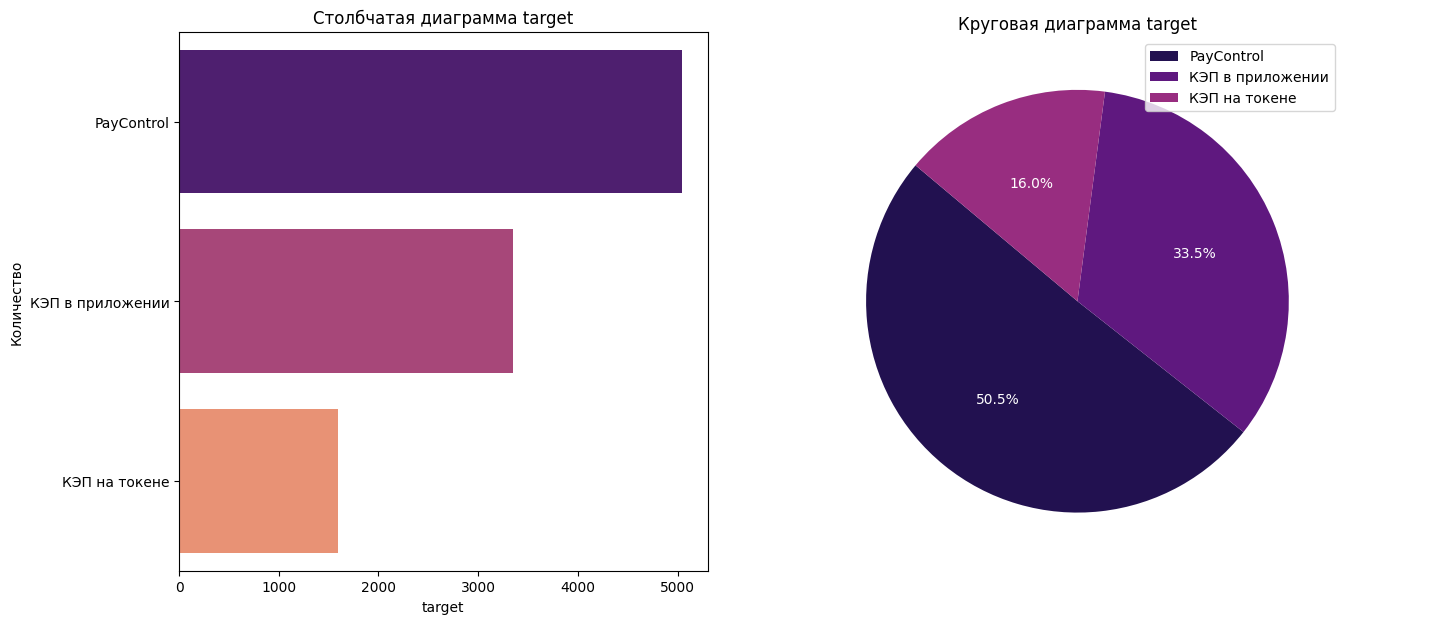

In [ ]:
research_vis_cat(df, ['target'], "magma")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/Colab Notebooks/datasets_alfa/data_final_target.csv'

df.to_csv(csv_path, index=False, encoding='utf-8')

print(f'Файл успешно сохранён: {csv_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Файл успешно сохранён: /content/drive/MyDrive/Colab Notebooks/datasets_alfa/data_final_target.csv
